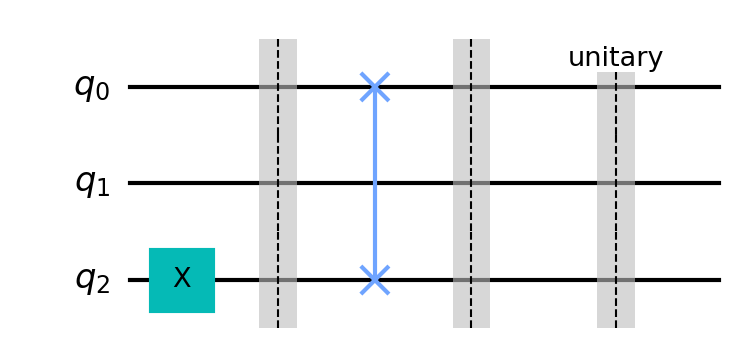

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [52]:
# """full_deutsch.ipynb"""
# Cell 1 - Deutsch's Algorithm

from __future__ import annotations

import typing

import numpy as np

from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_state_qsphere  # type: ignore
from qis101_utils import as_latex

if typing.TYPE_CHECKING:
    from typing import Any

    # from numpy.typing import NDArray


# Secret Oracle function
f: int = 0  # BALANCED circuit (NOP)
f: int = 1  # BALANCED circuit (NOT)
f: int = 2  # CONSTANT circuit (Always 0)
f: int = 3  # CONSTANT circuit (Always 1)

backend: Any = Aer.get_backend("aer_simulator")
qc: Any = QuantumCircuit(3)

qc.x(2)

f = 3

# Implement the Oracle (the secret circuit)
qc.barrier()
if f == int(0):  # NOP
    pass
if f == int(1):  # NOT
    qc.x(0)
if f == int(2):  # Always zero
    qc.swap(0, 1)
if f == int(3):  # Always one
    qc.swap(0, 2)
qc.barrier()

qc.save_unitary()

result: Any = execute(qc, backend).result()
unitary: Any = result.get_unitary()

display(qc.draw(output="mpl", scale=1.5))

display(as_latex(unitary))
display(
    as_latex(
        np.dot(unitary, np.array([1, 0, 0, 0, 0, 0, 0, 0])),
        prefix=r"\ket{0}\rightarrow",
    )
)
display(
    as_latex(
        np.dot(unitary, np.array([0, 1, 0, 0, 0, 0, 0, 0])),
        prefix=r"\ket{1}\rightarrow",
    )
)